In [1]:
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()


iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [2]:
iris_df['especie flor']=iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie flor
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
especies_mapeo= {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['especie_nombre'] = iris_df['especie flor'].map(especies_mapeo)
iris_df=iris_df.drop('especie flor',axis=1)

In [4]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie_nombre
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
pd.unique(iris_df['especie_nombre'])

lista_especies=['setosa', 'versicolor', 'virginica']

In [6]:

diccionario=dict()

for i in lista_especies:
    diccionario[i]=iris_df[iris_df['especie_nombre'] == i]
diccionario

diccionario.keys()


# con groupby sale mas facil 

dict_keys(['setosa', 'versicolor', 'virginica'])

In [7]:
promedio_medidas_setosa=diccionario['setosa'].mean(numeric_only=True)
promedio_medidas_versicolor=diccionario['versicolor'].mean(numeric_only=True)
promedio_medidas_virginica=diccionario['virginica'].mean(numeric_only=True)

In [26]:
print(f'Promedio medidas setosa: {promedio_medidas_setosa}')
print()
print(f'Promedio medidas versicolor: {promedio_medidas_versicolor}')
print()
print(f'Promedio medidas virginica: {promedio_medidas_virginica}')

Promedio medidas setosa: sepal length (cm)    5.006
sepal width (cm)     3.428
petal length (cm)    1.462
petal width (cm)     0.246
dtype: float64

Promedio medidas versicolor: sepal length (cm)    5.936
sepal width (cm)     2.770
petal length (cm)    4.260
petal width (cm)     1.326
dtype: float64

Promedio medidas virginica: sepal length (cm)    6.588
sepal width (cm)     2.974
petal length (cm)    5.552
petal width (cm)     2.026
dtype: float64


In [18]:
# distancias euclidiana:
from scipy.spatial.distance import euclidean


dis_eucli_etosa_versicolor=euclidean(promedio_medidas_setosa,promedio_medidas_versicolor)
dist_eucli_setosa_virginica=euclidean(promedio_medidas_setosa,promedio_medidas_virginica)
dist_eucli_versicolor_virginica=euclidean(promedio_medidas_versicolor,promedio_medidas_virginica)

print(f'Distancia euclidiana Setosa -versicolor: {dis_eucli_etosa_versicolor}')
print(f'Distancia euclidiana Setosa -virginica: {dist_eucli_setosa_virginica}')
print(f'Distancia euclidiana versicolor-virginica: {dist_eucli_versicolor_virginica}')



Distancia euclidiana Setosa -versicolor: 3.2082811597489393
Distancia euclidiana Setosa -virginica: 4.754507335150509
Distancia euclidiana versicolor-virginica: 1.6204888151418992


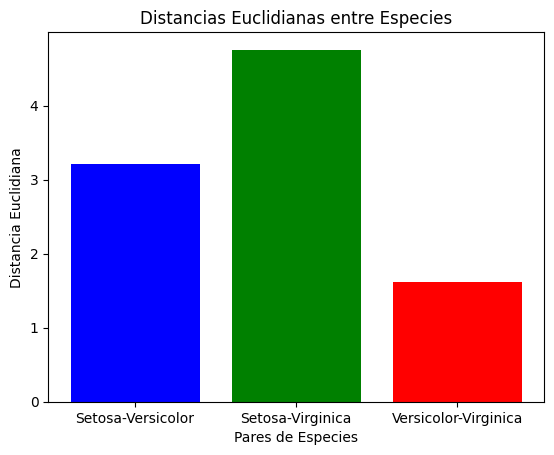

In [19]:
import matplotlib.pyplot as plt 
distancias = {
    'Setosa-Versicolor': dis_eucli_etosa_versicolor,
    'Setosa-Virginica': dist_eucli_setosa_virginica,
    'Versicolor-Virginica': dist_eucli_versicolor_virginica
}

plt.bar(distancias.keys(), distancias.values(), color=['blue', 'green', 'red'])


plt.xlabel('Pares de Especies')
plt.ylabel('Distancia Euclidiana')
plt.title('Distancias Euclidianas entre Especies')

plt.show()

In [20]:
# distancia manhattan: 


def manhattan_distance(vector1, vector2):
 
    return np.sum(np.abs(vector1 - vector2))



In [21]:
array_medidas_setosa=promedio_medidas_setosa.to_numpy()
array_medidas_versicolor=promedio_medidas_versicolor.to_numpy()
array_medidas_virginica=promedio_medidas_virginica.to_numpy()


In [23]:
dista_manhattan_setosa_versicolor = manhattan_distance(array_medidas_setosa, array_medidas_versicolor)
dista_manhattan_setosa_virginica= manhattan_distance(array_medidas_setosa,array_medidas_virginica)
dista_manhattan_versicolor_virginica= manhattan_distance(array_medidas_versicolor,array_medidas_virginica)

print(f'Distancia Manhattan Setosa -versicolor: {dista_manhattan_setosa_versicolor}')

print(f'Distancia Manhattan Setosa -verginica: {dista_manhattan_setosa_virginica}')

print(f'Distancia Manhattan versicolor- virginica : {dista_manhattan_versicolor_virginica}')


Distancia Manhattan Setosa -versicolor: 5.466000000000001
Distancia Manhattan Setosa -verginica: 7.905999999999999
Distancia Manhattan versicolor- virginica : 2.847999999999997


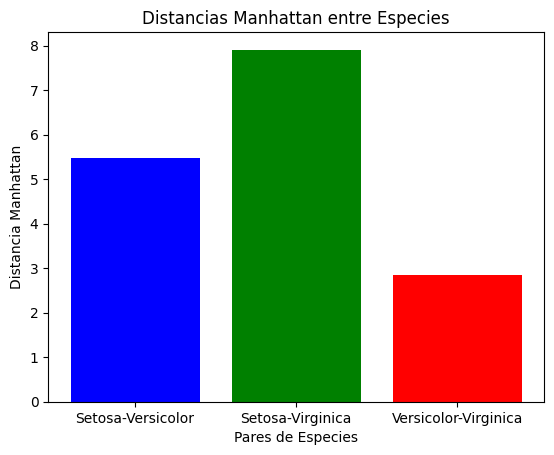

In [24]:
 
distancias1 = {
    'Setosa-Versicolor': dista_manhattan_setosa_versicolor,
    'Setosa-Virginica': dista_manhattan_setosa_virginica,
    'Versicolor-Virginica': dista_manhattan_versicolor_virginica
}

plt.bar(distancias1.keys(), distancias1.values(), color=['blue', 'green', 'red'])

# Añadir etiquetas y título
plt.xlabel('Pares de Especies')
plt.ylabel('Distancia Manhattan')
plt.title('Distancias Manhattan entre Especies')

plt.show()

In [32]:
svm_palette = ['#3d5a80', '#98c1d9', '#ee6c4d', '#293241']


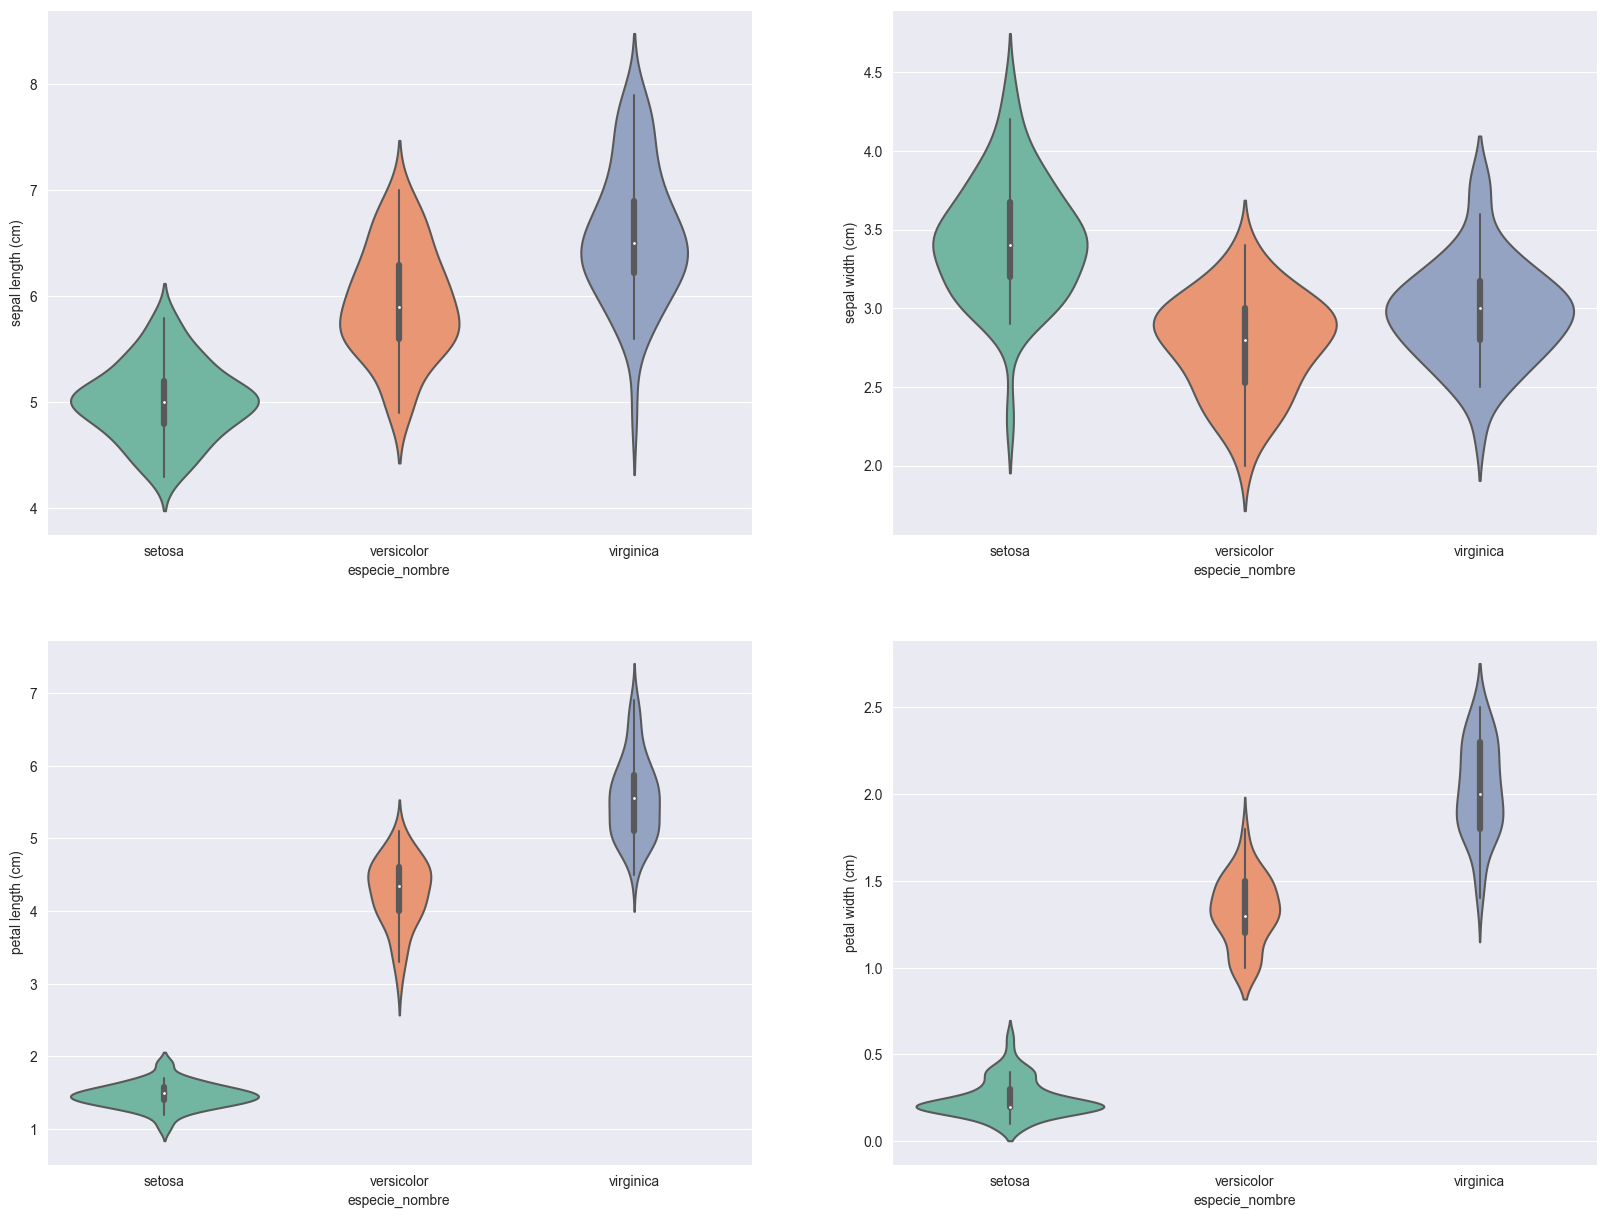

In [36]:
import seaborn as sns

plt.figure(figsize=(20, 15))
sns.set_style('darkgrid')


plt.subplot(2, 2, 1)
sns.violinplot(x='especie_nombre', y='sepal length (cm)', data=iris_df, palette=svm_palette)
plt.subplot(2, 2, 2)
sns.violinplot(x='especie_nombre', y='sepal width (cm)', data=iris_df, palette=svm_palette)
plt.subplot(2, 2, 3)
sns.violinplot(x='especie_nombre', y='petal length (cm)', data=iris_df, palette=svm_palette)
plt.subplot(2, 2, 4)
sns.violinplot(x='especie_nombre', y='petal width (cm)', data=iris_df, palette=svm_palette)

plt.show()

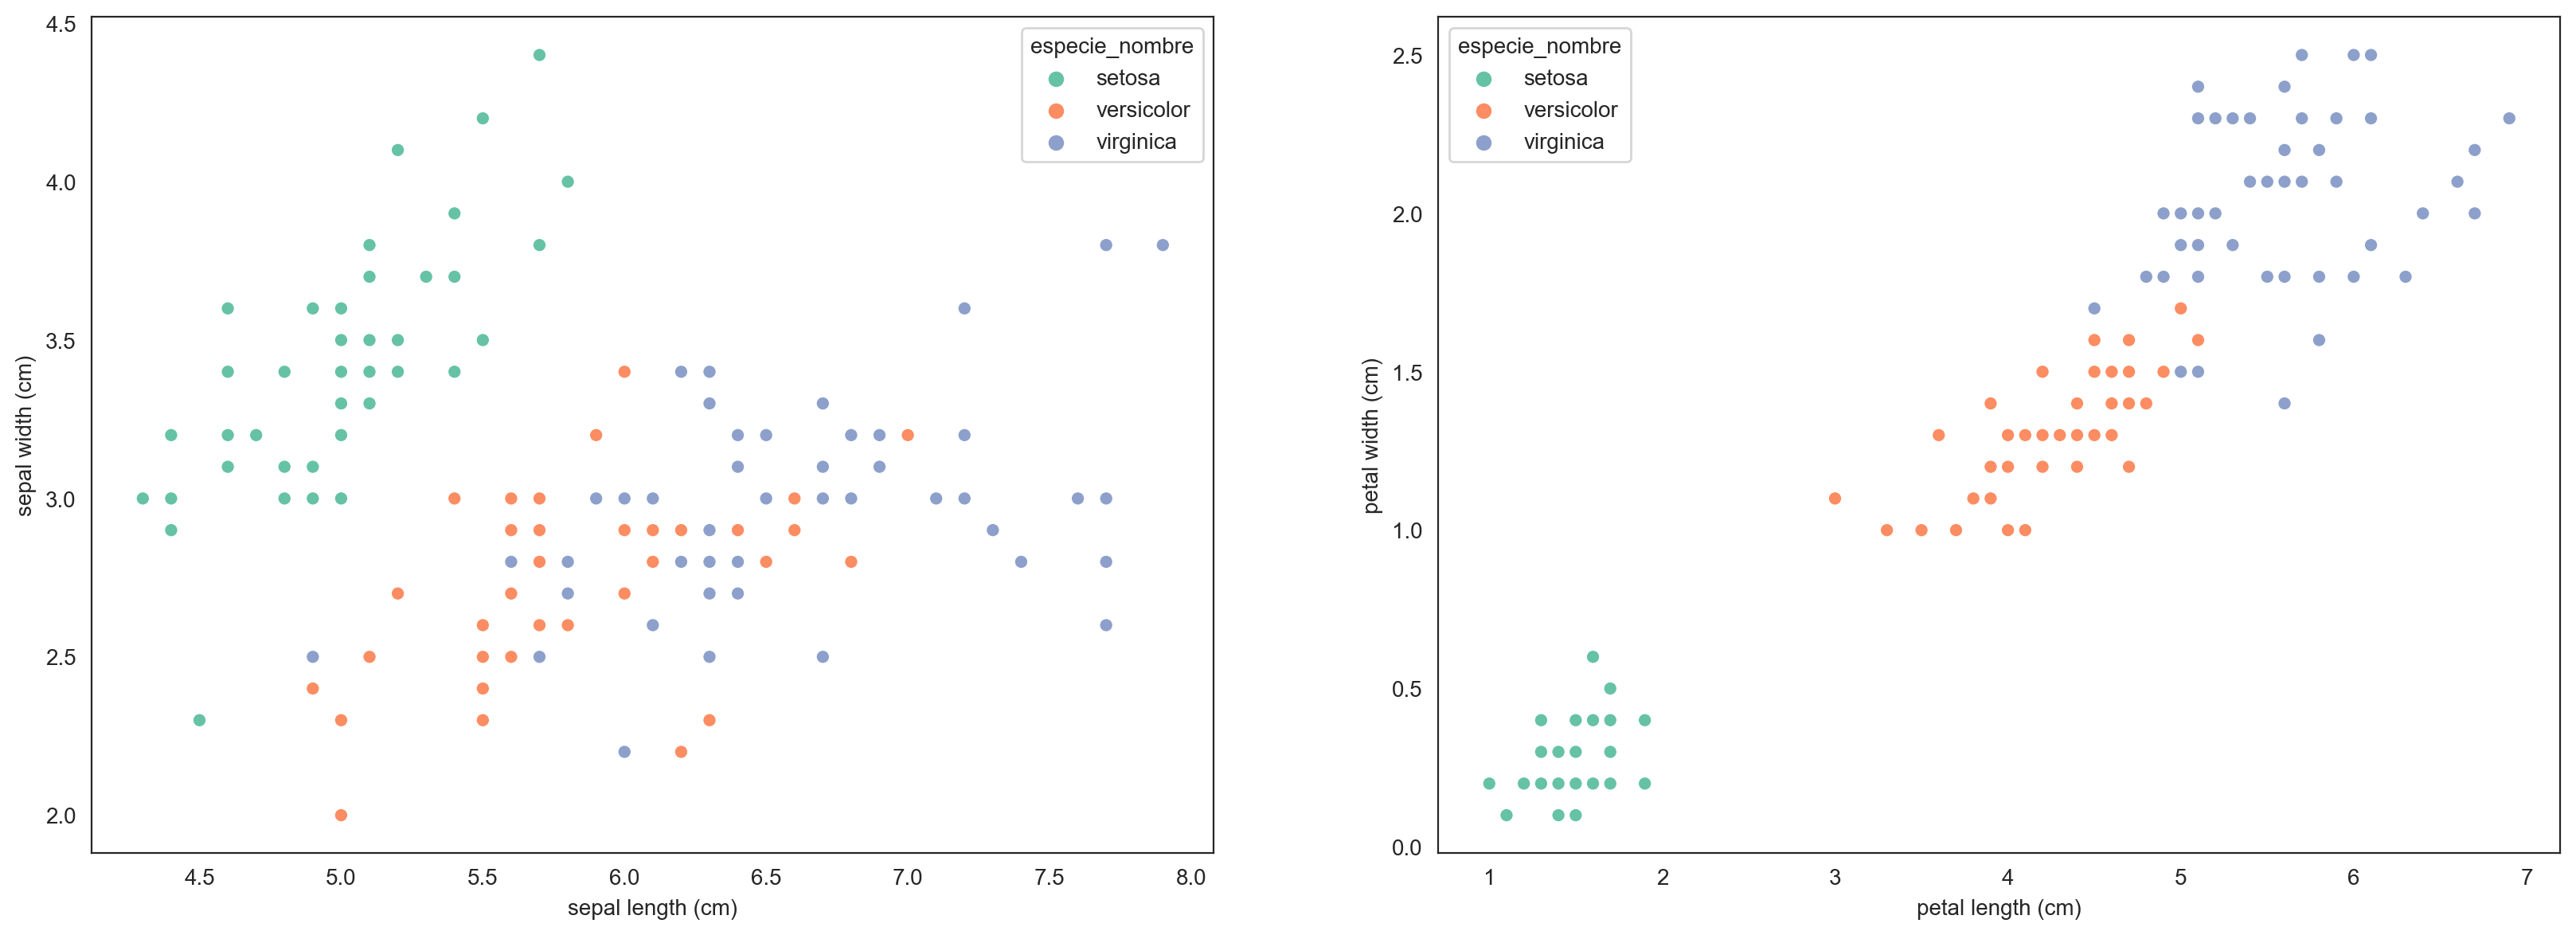

In [41]:

plt.figure(figsize=(20, 15), dpi=200)
sns.set_style('white')

plt.subplot(2, 2, 1)
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='especie_nombre', data=iris_df, palette=svm_palette)
plt.subplot(2, 2, 2)
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='especie_nombre', data=iris_df, palette=svm_palette)

plt.show()